<a href="https://colab.research.google.com/github/JieDong-Melissa/Kickstarter_Success/blob/main/Kickstarter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.tools as tls


from scipy import stats

In [73]:
kickstarter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kickstarter/kickstarter_data_full.csv', index_col=0)

<ipython-input-73-6ac79ecd85ad>:1: DtypeWarning:

Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.



In [74]:
kickstarter.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0


In [75]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           20632 non-null  int64  
 1   photo                        20632 non-null  object 
 2   name                         20632 non-null  object 
 3   blurb                        20626 non-null  object 
 4   goal                         20632 non-null  float64
 5   pledged                      20632 non-null  float64
 6   state                        20632 non-null  object 
 7   slug                         20632 non-null  object 
 8   disable_communication        20632 non-null  bool   
 9   country                      20632 non-null  object 
 10  currency                     20632 non-null  object 
 11  currency_symbol              20632 non-null  object 
 12  currency_trailing_code       20632 non-null  bool   
 13  deadline             

In [76]:
missing_values = kickstarter.isnull().sum()
missing_values[0:10]

id                       0
photo                    0
name                     0
blurb                    6
goal                     0
pledged                  0
state                    0
slug                     0
disable_communication    0
country                  0
dtype: int64

In [77]:
missing_values[10:20]

currency                  0
currency_symbol           0
currency_trailing_code    0
deadline                  0
state_changed_at          0
created_at                0
launched_at               0
staff_pick                0
backers_count             0
static_usd_rate           0
dtype: int64

In [78]:
missing_values[20:30]

usd_pledged        0
creator            0
location          45
category        1889
profile            0
spotlight          0
urls               0
source_url         0
friends        20572
is_starred     20572
dtype: int64

In [79]:
missing_values[30:40]

is_backing                  20572
permissions                 20572
name_len                        5
name_len_clean                  5
blurb_len                       5
blurb_len_clean                 5
deadline_weekday                0
state_changed_at_weekday        0
created_at_weekday              0
launched_at_weekday             0
dtype: int64

In [80]:
missing_values[40:50]

deadline_month            0
deadline_day              0
deadline_yr               0
deadline_hr               0
state_changed_at_month    0
state_changed_at_day      0
state_changed_at_yr       0
state_changed_at_hr       0
created_at_month          0
created_at_day            0
dtype: int64

In [81]:
missing_values[50:67]

created_at_yr                  0
created_at_hr                  0
launched_at_month              0
launched_at_day                0
launched_at_yr                 0
launched_at_hr                 0
create_to_launch               0
launch_to_deadline             0
launch_to_state_change         0
create_to_launch_days          0
launch_to_deadline_days        0
launch_to_state_change_days    0
SuccessfulBool                 0
USorGB                         0
TOPCOUNTRY                     0
LaunchedTuesday                0
DeadlineWeekend                0
dtype: int64

In [82]:
kickstarter['friends'].isnull().value_counts()

friends
True     20572
False       60
Name: count, dtype: int64

In [83]:
kickstarter['friends'].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
20627    True
20628    True
20629    True
20630    True
20631    True
Name: friends, Length: 20632, dtype: bool

In [84]:
kickstarter.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

In [85]:
! pip install klib
import klib

GridSpec(6, 6)

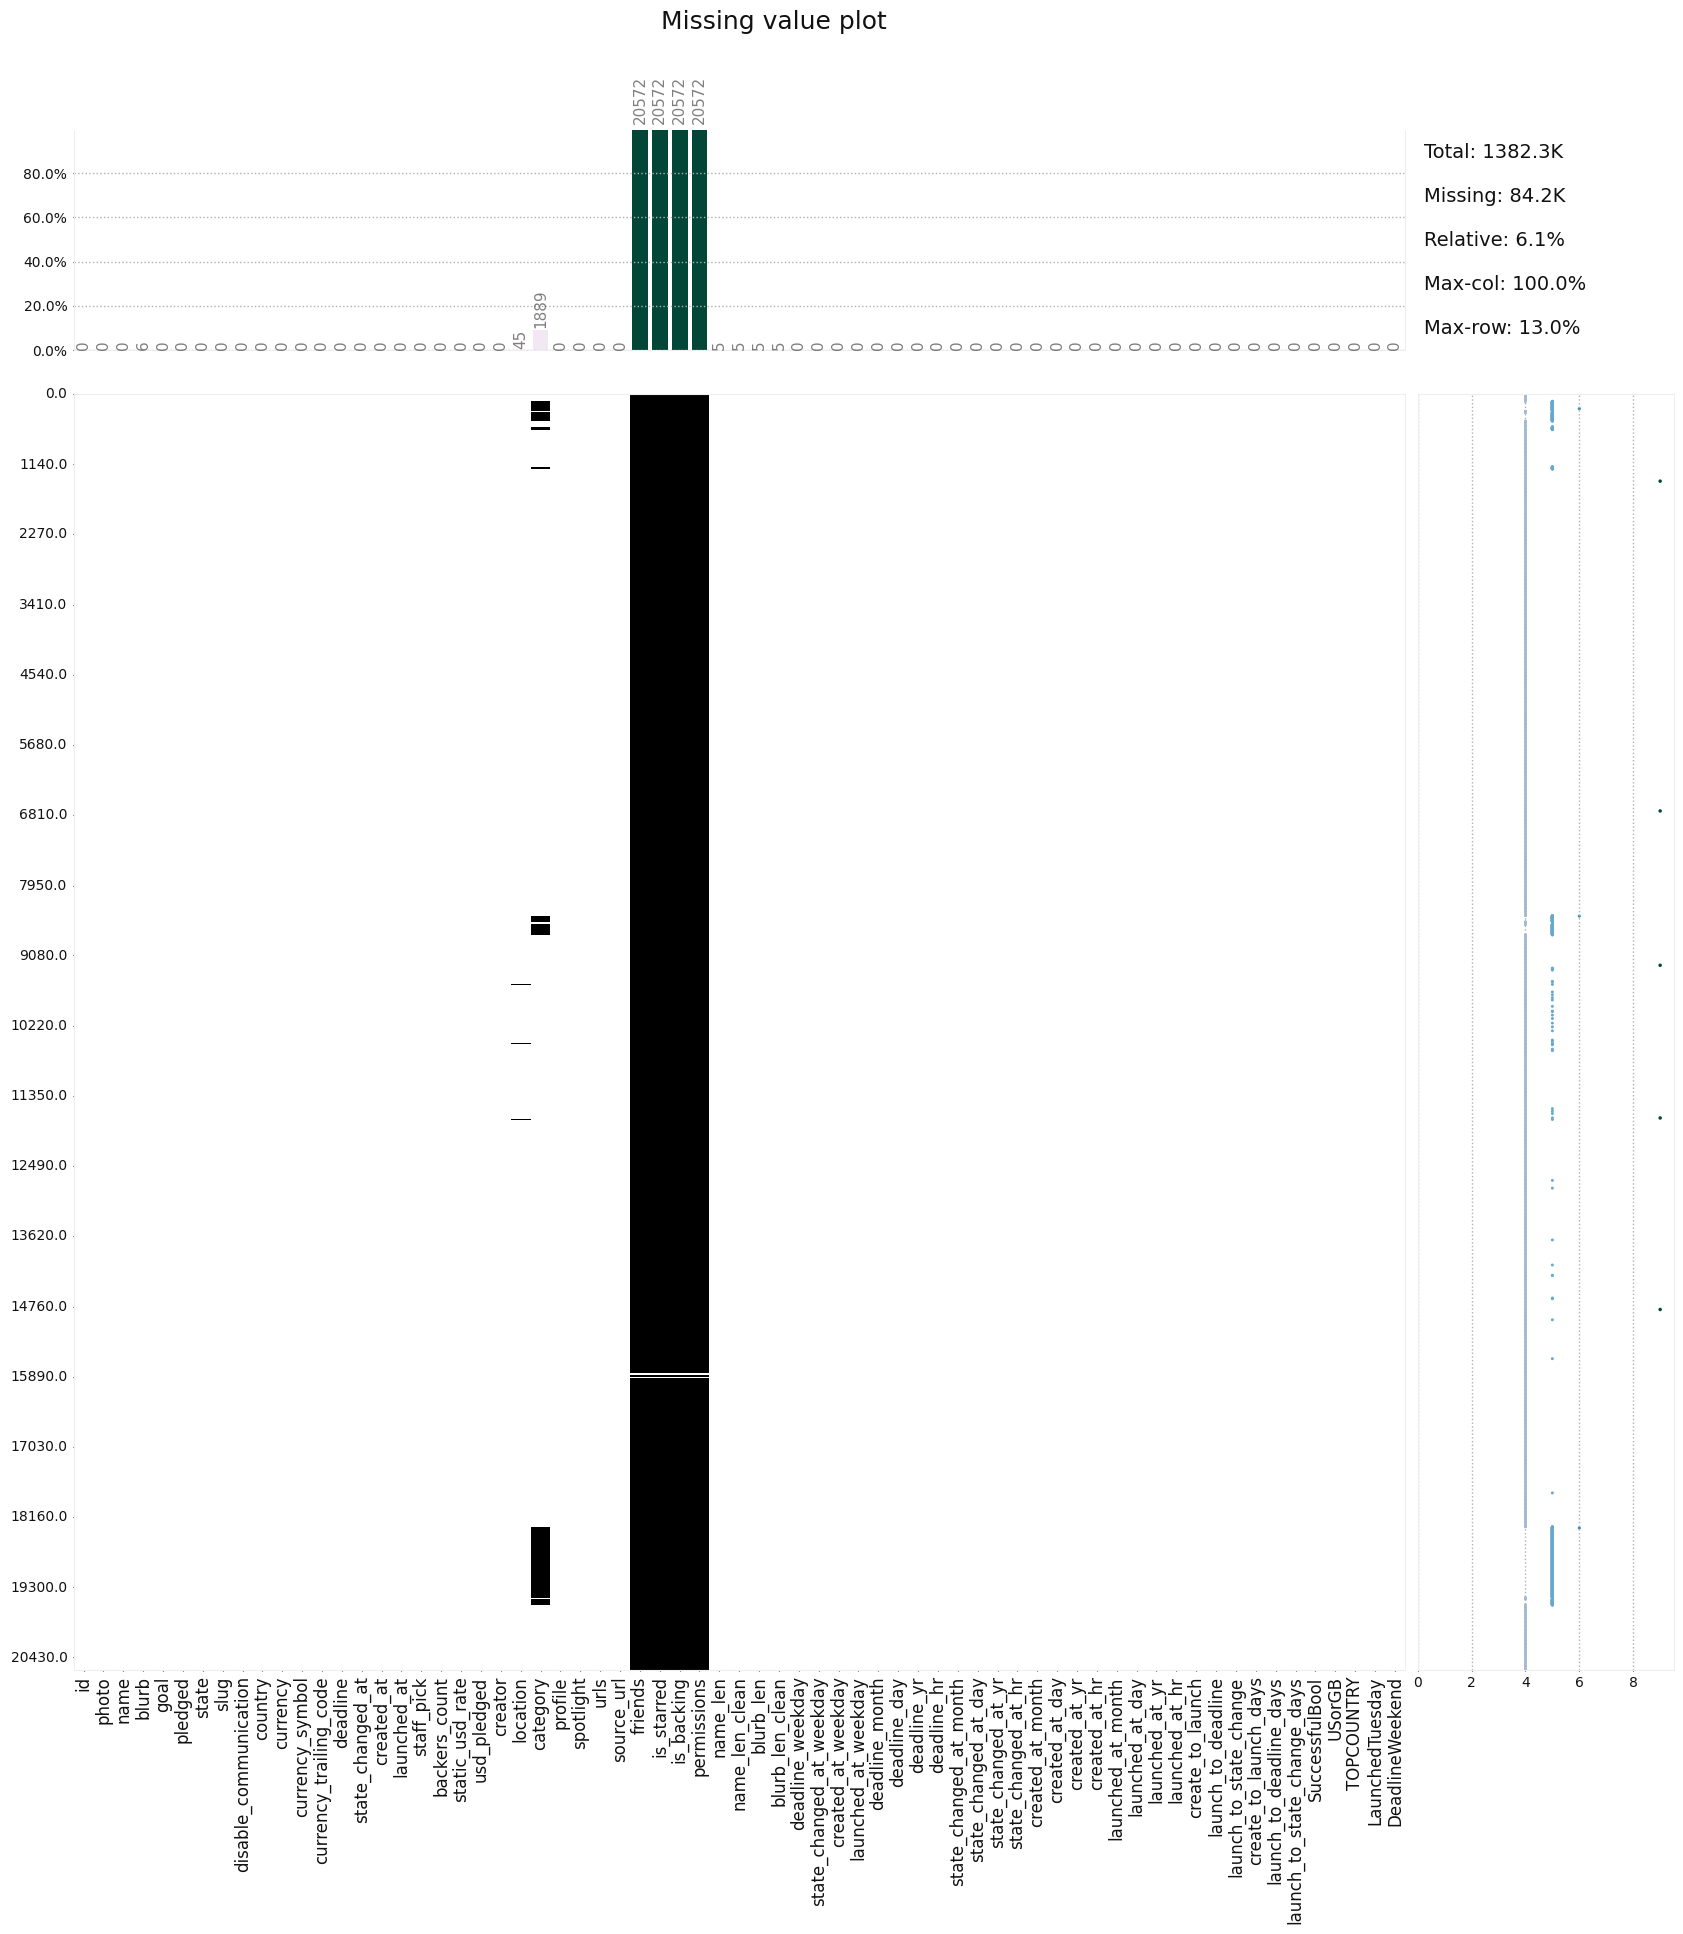

In [86]:
klib.missingval_plot(kickstarter)

In [87]:
klib.corr_mat(kickstarter)

,id,goal,pledged,disable_communication,currency_trailing_code,staff_pick,backers_count,static_usd_rate,usd_pledged,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
id,1.00,0.01,0.00,0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.02,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.00,0.00,-0.01,0.00,-0.00,0.00,0.00,0.01,0.01,-0.02,-0.00,-0.00,0.00,-0.01
goal,0.01,1.00,0.01,-0.00,0.01,-0.01,0.00,-0.03,0.01,-0.04,-0.02,-0.01,-0.01,-0.01,0.00,-0.02,0.01,0.00,0.00,-0.01,0.01,-0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,0.01,-0.01,0.04,0.02,-0.04,-0.02,-0.02,0.00,-0.01
pledged,0.00,0.01,1.00,-0.00,0.04,0.26,0.72,-0.05,0.95,0.22,0.09,0.09,-0.00,0.01,0.01,-0.01,-0.00,-0.04,0.01,-0.01,0.00,-0.04,0.00,0.00,-0.01,-0.02,0.01,0.00,-0.00,-0.07,0.04,0.04,0.06,0.22,0.02,0.02,0.05,-0.01
disable_communication,0.00,-0.00,-0.00,1.00,-0.00,-0.04,0.00,-0.01,-0.01,-0.07,0.03,0.03,-0.02,-0.01,-0.00,0.02,0.03,-0.01,-0.00,-0.00,0.03,0.01,0.01,-0.01,0.03,-0.01,-0.00,0.01,0.03,0.01,-0.01,0.01,-0.15,-0.07,-0.02,-0.02,0.01,0.00
currency_trailing_code,0.01,0.01,0.04,-0.00,1.00,0.03,0.03,-0.70,0.03,0.01,0.02,0.03,-0.02,-0.05,-0.01,-0.01,-0.15,0.18,-0.01,-0.01,-0.15,0.19,-0.00,-0.01,-0.16,0.27,-0.00,-0.01,-0.15,0.21,0.05,0.03,0.02,0.01,0.27,0.29,0.01,-0.01
staff_pick,-0.00,-0.01,0.26,-0.04,0.03,1.00,0.20,0.02,0.27,0.34,0.08,0.08,-0.00,0.02,0.04,-0.00,-0.12,-0.01,0.04,-0.00,-0.12,-0.01,0.01,0.00,-0.13,-0.01,0.02,0.01,-0.12,-0.06,0.05,-0.02,0.04,0.34,0.06,0.06,0.04,-0.03
backers_count,-0.00,0.00,0.72,0.00,0.03,0.20,1.00,-0.00,0.76,0.19,0.06,0.06,-0.00,0.01,0.01,-0.01,-0.02,-0.03,0.01,-0.01,-0.02,-0.02,0.00,0.00,-0.03,-0.00,0.01,0.01,-0.02,-0.05,0.03,0.02,0.04,0.19,0.03,0.03,0.03,-0.01
static_usd_rate,-0.00,-0.03,-0.05,-0.01,-0.70,0.02,-0.00,1.00,-0.00,0.06,-0.00,-0.02,0.04,0.03,0.03,0.00,-0.08,-0.08,0.03,0.01,-0.08,-0.09,-0.03,0.01,-0.06,-0.12,-0.01,0.01,-0.07,-0.11,-0.02,-0.05,-0.01,0.06,0.35,0.29,-0.01,0.01
usd_pledged,0.00,0.01,0.95,-0.01,0.03,0.27,0.76,-0.00,1.00,0.23,0.09,0.09,0.00,0.01,0.01,-0.01,-0.01,-0.04,0.01,-0.01,-0.01,-0.03,-0.00,0.00,-0.02,-0.01,0.01,0.00,-0.01,-0.07,0.04,0.04,0.06,0.23,0.04,0.04,0.05,-0.01
spotlight,-0.02,-0.04,0.22,-0.07,0.01,0.34,0.19,0.06,0.23,1.00,0.13,0.13,0.02,0.06,0.03,-0.01,-0.09,-0.00,0.03,-0.01,-0.08,0.01,-0.01,-0.00,-0.08,0.01,0.01,-0.01,-0.08,-0.05,0.01,-0.11,0.07,1.00,0.11,0.11,0.04,-0.03


In [88]:
kickstarter_1 = klib.data_cleaning(kickstarter)

Shape of cleaned data: (20632, 63) - Remaining NAs: 1960


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 4
     of which 0 single valued.     Columns: []
Dropped missing values: 82288
Reduced memory by at least: 6.42 MB (-60.23%)



In [89]:
kickstarter_1.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'name_len', 'name_len_clean',
       'blurb_len', 'blurb_len_clean', 'deadline_weekday',
       'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday',
       'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr',
       'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr',
       'state_changed_at_hr', 'created_at_month', 'created_at_day',
       'created_at_yr', 'created_at_hr', 'launched_at_month',
       'launched_at_day', 'launched_at_yr', 'launched_at_hr',
       'create_to_launch', 'launch_to_deadline', 'launch_to_state_change',
   

In [90]:
kickstarter_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           20632 non-null  int32   
 1   photo                        20632 non-null  string  
 2   name                         20632 non-null  string  
 3   blurb                        20626 non-null  string  
 4   goal                         20632 non-null  float32 
 5   pledged                      20632 non-null  float64 
 6   state                        20632 non-null  category
 7   slug                         20632 non-null  string  
 8   disable_communication        20632 non-null  boolean 
 9   country                      20632 non-null  category
 10  currency                     20632 non-null  category
 11  currency_symbol              20632 non-null  category
 12  currency_trailing_code       20632 non-null  boolean 
 13  d

# **EDA (Exploratory Data Analysis)**

In [91]:
pd.concat([kickstarter['launched_at_weekday'].value_counts(),
          kickstarter['deadline_weekday'].value_counts(),
          kickstarter['created_at_weekday'].value_counts()], axis=1)

,count,count,count
Tuesday,4645,1976,3612
Monday,4200,2221,3474
Wednesday,3741,3202,3325
Thursday,3094,3444,3155
Friday,2818,3764,2699
Saturday,1075,2984,2090
Sunday,1059,3041,2277


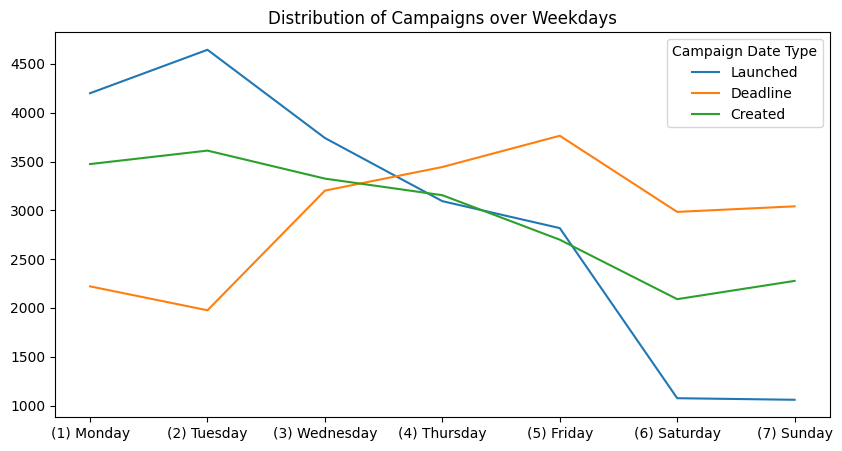

In [92]:
plot_df = pd.concat([kickstarter['launched_at_weekday'].value_counts(),
                     kickstarter['deadline_weekday'].value_counts(),
                     kickstarter['created_at_weekday'].value_counts()], axis=1)

# set custom index for weekdays
plot_df.index = ["(2) Tuesday", "(1) Monday", "(3) Wednesday", "(4) Thursday",
                 "(5) Friday", "(6) Saturday", "(7) Sunday"]

# sort the dataframe by index
plot_df = plot_df.sort_index()

# plot each line with a specific label
plt.figure(figsize=(10, 5))
plt.plot(plot_df.index, plot_df.iloc[:, 0], label="Launched")
plt.plot(plot_df.index, plot_df.iloc[:, 1], label="Deadline")
plt.plot(plot_df.index, plot_df.iloc[:, 2], label="Created")

# add title
plt.title("Distribution of Campaigns over Weekdays")

# customize the legend
plt.legend(title="Campaign Date Type", loc="upper right")

In [93]:
plot_df_hr = pd.concat([
    kickstarter['launched_at_hr'].value_counts(),
    kickstarter['created_at_hr'].value_counts(),
    kickstarter['deadline_hr'].value_counts()

],axis=1)
plot_df_hr

,count,count,count
11,1616,1193,1496
10,1583,1190,1344
14,1388,1248,1292
12,1350,1301,1193
13,1296,1286,1171
15,1276,1331,1165
16,1251,1129,1278
9,1162,1090,980
17,1138,1104,1175
8,912,885,756


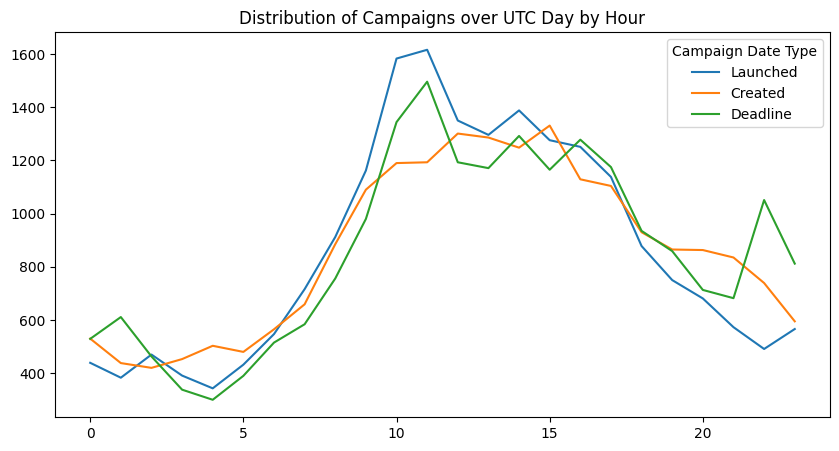

In [94]:
plot_df_hr = plot_df_hr.sort_index()
plt.figure(figsize=(10, 5))
plt.plot(plot_df_hr.index, plot_df_hr.iloc[:,0], label="Launched")
plt.plot(plot_df_hr.index, plot_df_hr.iloc[:,1], label="Created")
plt.plot(plot_df_hr.index, plot_df_hr.iloc[:,2], label="Deadline")
plt.title("Distribution of Campaigns over UTC Day by Hour")

plt.legend(title="Campaign Date Type", loc="upper right")

<Axes: title={'center': 'State Distribution'}, xlabel='state'>

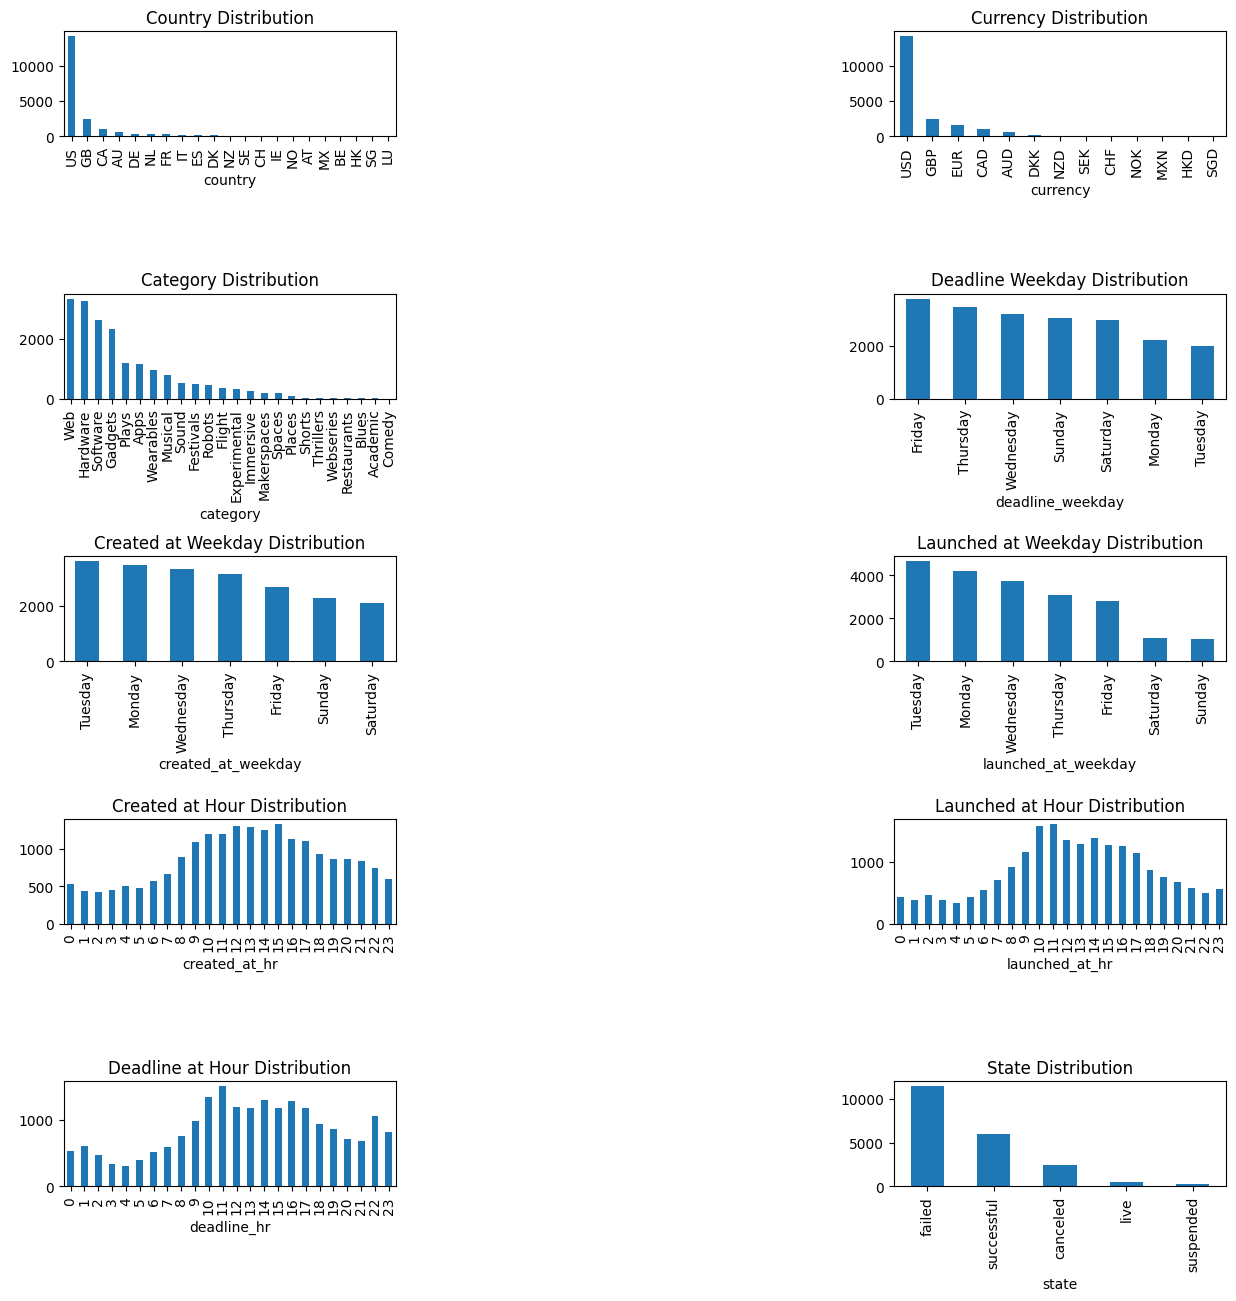

In [95]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=1.5, wspace=1.5)


kickstarter['country'].value_counts().plot(kind='bar', ax=axes[0,0], title='Country Distribution', figsize=(15,15))
kickstarter['currency'].value_counts().plot(kind='bar', ax=axes[0,1], title='Currency Distribution', figsize=(15,15))
kickstarter['category'].value_counts().plot(kind='bar', ax=axes[1,0], title='Category Distribution', figsize=(15,15))
kickstarter['deadline_weekday'].value_counts().plot(kind='bar', ax=axes[1,1], title='Deadline Weekday Distribution', figsize=(15,15))
kickstarter['created_at_weekday'].value_counts().plot(kind='bar', ax=axes[2,0], title='Created at Weekday Distribution', figsize=(15,15))
kickstarter['launched_at_weekday'].value_counts().plot(kind='bar', ax=axes[2,1], title='Launched at Weekday Distribution', figsize=(15,15))
kickstarter['created_at_hr'].value_counts().sort_index().plot(kind='bar', ax=axes[3,0], title='Created at Hour Distribution', figsize=(15,15))
kickstarter['launched_at_hr'].value_counts().sort_index().plot(kind='bar', ax=axes[3,1], title='Launched at Hour Distribution', figsize=(15,15))
kickstarter['deadline_hr'].value_counts().sort_index().plot(kind='bar', ax=axes[4,0], title='Deadline at Hour Distribution', figsize=(15,15))
kickstarter['state'].value_counts().plot(kind='bar', ax=axes[4,1], title='State Distribution', figsize=(15,15))

In [96]:
def extract_days(val):
  try:
    l = val.split(" ")
    return int(l[0])
  except:
    return np.nan

kickstarter['create_to_launch_days'] = kickstarter['create_to_launch'].map(extract_days)
kickstarter['launch_to_deadline_days'] = kickstarter['launch_to_deadline'].map(extract_days)
kickstarter['launch_to_state_change_days'] = kickstarter['launch_to_state_change'].map(extract_days)

In [97]:
kickstarter.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0


<Axes: xlabel='launch_to_deadline_days'>

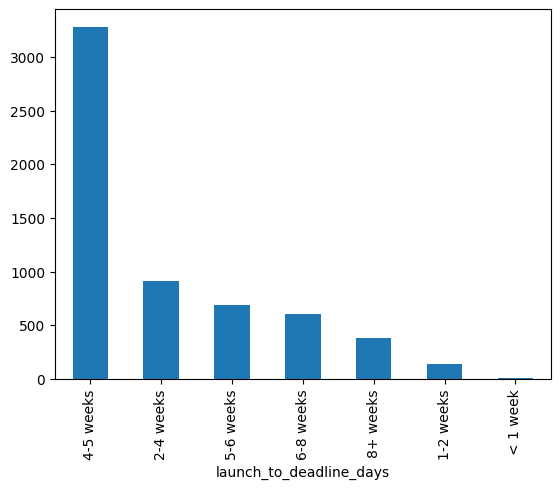

In [98]:
def return_week_bins(val):
  if val < 7:
    return "< 1 week"
  elif val < 14:
    return  "1-2 weeks"
  elif val < 28:
    return "2-4 weeks"
  elif val < 35:
    return "4-5 weeks"
  elif val < 42:
    return "5-6 weeks"
  elif val < 56:
    return "6-8 weeks"
  else:
    return "8+ weeks"

successful_state_series = kickstarter[kickstarter['state'] == "successful"]['launch_to_deadline_days']
successful_state_series.map(return_week_bins).value_counts().plot(kind='bar')

<Axes: xlabel='create_to_launch_days'>

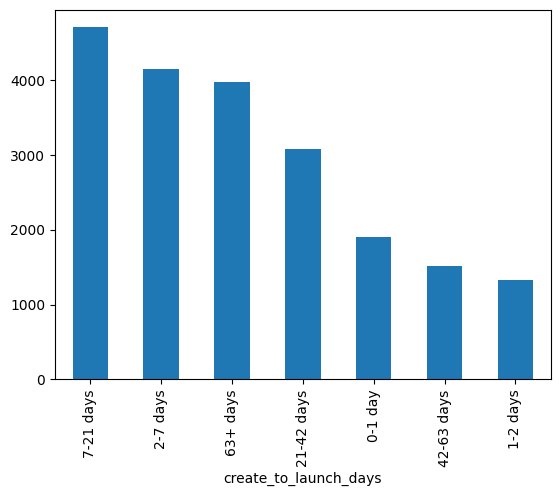

In [99]:
def return_date_bins(val):
  if val < 1:
    return "0-1 day"
  elif val < 2:
    return "1-2 days"
  elif val < 7:
    return "2-7 days"
  elif val < 21:
    return "7-21 days"
  elif val < 42:
    return "21-42 days"
  elif val < 63:
    return "42-63 days"
  else:
    return "63+ days"

create_launch_series = kickstarter['create_to_launch_days']
create_launch_series.map(return_date_bins).value_counts().plot(kind='bar')

In [100]:
sucessful_kickstarter = kickstarter[kickstarter['state'] == 'successful']
failed_kickstarter = kickstarter[kickstarter['state'] == 'failed']
cancelled_kickstarter = kickstarter[kickstarter['state'] == 'canceled']

In [101]:
# print("successful campaigns:" , len(sucessful_kickstarter))
# print("failed campaigns:", len(failed_kickstarter))
# print("cancelled campaigns:", len(cancelled_kickstarter))

In [102]:
state = round(kickstarter["state"].value_counts() / len(kickstarter["state"]) * 100,2)
state

state
failed        55.33
successful    29.17
canceled      11.92
live           2.46
suspended      1.11
Name: count, dtype: float64

In [103]:
labels = list(state.index)
values = list(state.values)
labels

['failed', 'successful', 'canceled', 'live', 'suspended']

In [104]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

In [105]:
pie_chart = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))
layout = go.Layout(title='Distribution of States', legend=dict(orientation='h'))
fig = go.Figure(data=[pie_chart], layout=layout)
iplot(fig)

In [106]:
kickstarter_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           20632 non-null  int32   
 1   photo                        20632 non-null  string  
 2   name                         20632 non-null  string  
 3   blurb                        20626 non-null  string  
 4   goal                         20632 non-null  float32 
 5   pledged                      20632 non-null  float64 
 6   state                        20632 non-null  category
 7   slug                         20632 non-null  string  
 8   disable_communication        20632 non-null  boolean 
 9   country                      20632 non-null  category
 10  currency                     20632 non-null  category
 11  currency_symbol              20632 non-null  category
 12  currency_trailing_code       20632 non-null  boolean 
 13  d

In [107]:
n = 'name_len_clean'
compare_name_len_clean = pd.concat(
[kickstarter[n].value_counts(),
sucessful_kickstarter[n].value_counts(),
failed_kickstarter[n].value_counts(),
cancelled_kickstarter[n].value_counts()], axis=1
)

In [108]:
compare_name_len_clean

,count,count,count,count
name_len_clean,,,,
6.0,3128,1029,1597,396.0
7.0,2941,980,1389,463.0
5.0,2727,779,1575,284.0
4.0,2449,656,1417,280.0
3.0,2264,532,1459,203.0
8.0,2123,734,956,345.0
2.0,1781,376,1136,212.0
1.0,1356,209,1101,4.0
9.0,1164,447,500,170.0


In [109]:
compare_name_len_clean.columns = ['all', 'successful', 'failed', 'cancelled']
compare_name_len_clean.loc['total'] = compare_name_len_clean.sum(axis=0)

def get_perc(val, col):
  return (val / compare_name_len_clean[col]['total']) * 100

compare_name_len_clean['all_perc'] = compare_name_len_clean['all'].apply(get_perc, args=('all',))
compare_name_len_clean['success_perc'] = compare_name_len_clean['successful'].apply(get_perc, args=('successful',))
compare_name_len_clean['failed_perc'] = compare_name_len_clean['failed'].apply(get_perc, args=('failed',))
compare_name_len_clean['cancelled_perc'] = compare_name_len_clean['cancelled'].apply(get_perc, args=('cancelled',))


# Descriptive Statistics - **Goal Distribution**

In [110]:
kickstarter_US = kickstarter[kickstarter['currency'] == 'USD']

In [111]:
kickstarter_US[kickstarter_US['state'] == 'failed']

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
5,808486483,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Shadow School Board - Reforming Texas School B...,Shadow School Board will provide parents & tax...,13000.0,1136.0,failed,shadow-school-board-reforming-texas-school-boards,False,US,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,2,30,30,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20621,1689061563,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Roote: the first location services social medi...,"See where your friends are, what they're doing...",6000.0,100.0,failed,roote-the-first-location-services-social-media...,False,US,...,30 days 00:00:00.000000000,30 days 00:00:04.000000000,19,30,30,0,1,1,0,0
20622,287082078,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Hebrew Learning App,I want to make an app that teaches kids how to...,1000.0,201.0,failed,hebrew-learning-app,False,US,...,30 days 00:00:00.000000000,30 days 00:00:01.000000000,0,30,30,0,1,1,0,1
20624,1668583582,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Walks,"""Walks"" a new way to enjoy outdoors activities...",40000.0,761.0,failed,walks,False,US,...,30 days 00:00:00.000000000,30 days 00:00:03.000000000,269,30,30,0,1,1,1,0
20629,1790340460,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Sloth Face App,"We all love fatbooth and Ugly booth, why not s...",10000.0,0.0,failed,sloth-face-app,False,US,...,60 days 00:00:00.000000000,60 days 00:00:04.000000000,0,60,60,0,1,1,0,0


In [112]:
kickstarter_US.loc[kickstarter_US['state'].isin(['suspended', 'canceled']), 'state'] = 'failed'

In [113]:
kickstarter_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14141 entries, 0 to 20630
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14141 non-null  int64  
 1   photo                        14141 non-null  object 
 2   name                         14141 non-null  object 
 3   blurb                        14138 non-null  object 
 4   goal                         14141 non-null  float64
 5   pledged                      14141 non-null  float64
 6   state                        14141 non-null  object 
 7   slug                         14141 non-null  object 
 8   disable_communication        14141 non-null  bool   
 9   country                      14141 non-null  object 
 10  currency                     14141 non-null  object 
 11  currency_symbol              14141 non-null  object 
 12  currency_trailing_code       14141 non-null  bool   
 13  deadline             

In [114]:
kickstarter_success = kickstarter_US[kickstarter_US['state'] == 'successful'].sample(10000, replace=True)
kickstarter_failed = kickstarter_US[kickstarter_US['state'] == 'failed'].sample(10000, replace=True)

trace0 = go.Histogram(

             x=np.log(kickstarter_US.goal + 1),
             histnorm='probability', showlegend=False,
             xbins=dict(
                 start=-5.0,
                 end=19.0,
                 size=1
             )
)

trace1 = go.Histogram(

             x=np.log(kickstarter_US.pledged + 1),
             histnorm='probability', showlegend=False,
             xbins=dict(
                 start=-5.0,
                 end=19.0,
                 size=1
             )
)

failed = np.log(kickstarter_failed['goal'] + 1)
success = np.log(kickstarter_success['goal'] + 1)

trace2 = go.Histogram(
    x=failed,
    opacity=0.60, nbinsx=30, name='Goals Failed', histnorm='probability')

trace3 = go.Histogram(
    x=success,
    opacity=0.60, nbinsx=30, name='Goals Successful', histnorm='probability'
)

# data = [trace0, trace1, trace2, trace3]
# layout = go.Layout(barmode='overlay')

fig = tls.make_subplots(rows=2, cols=2, specs=[ [{'colspan': 2}, None], [{}, {}]],
                                 subplot_titles=('Failed and Successful Projects', 'Goal', 'Pledged'))

fig.append_trace(trace0, 2, 1)
fig.append_trace(trace1, 2, 2)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 1)

fig['layout'].update(title='Distributions',
                     height=500, width=900, barmode='overlay')
iplot(fig)

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Performing Normality Tests: Shapiro-Wilk Test


In [115]:
stat, p = stats.shapiro(np.log(kickstarter_US['goal'] + 1).sample(500, random_state=42)
                        )
print("Shapiro Stat:", stat)
print("P-value:", p)
if p >= .01:
  print('Normal Distribution')
else:
  print("Non-Normal Disttribution")


Shapiro Stat: 0.9871941208839417
P-value: 0.00022352277301251888
Non-Normal Disttribution


# Inferential Statistic - T-Test


*   One-Sample T-test
*   Independent (Two-Sample) T-test




One-Sample T-Test: Compares the mean of a single group against a known mean


*   Null hypothesis (H0): Both (success project and failed project) distributions are the same
*   Alternative hypothesis (H1): Both (success project and failed project) distributions are different



In [116]:
def ttest_oneside(cols, alpha=0.05):
  pop_mean = cols[0].mean()
  sample = cols[1]

  print(f"Mean of Population: {pop_mean} \n Mean of Sample: {sample.mean()}")
  ttest_val, pval = stats.ttest_1samp(sample, pop_mean)

  print(f"t-test value: {ttest_val}")
  print("Comparing p_value by ... \n")
  print(f"p-value result: {pval}")

  if pval < alpha:
    print("we are rejecting null hypothesis")
  else:
    print("we are accepting null hypothesis")

In [117]:
ttest_oneside([np.log(kickstarter_US['goal']+1), success])

Mean of Population: 9.468520226807117 
 Mean of Sample: 8.811505139514294
t-test value: -38.31194465074376
Comparing p_value by ... 

p-value result: 8.881213638049638e-300
we are rejecting null hypothesis


## Two-sampled T-test: Compares the means of two independent groups to see if there is a statistically significant difference between them



*   Null Hypothesis (H0): There is no difference in the average goal amount between successful and failed campaigns.
*   Alternative Hypothesis (H1) : There is a difference in the average goal amount between successful and failed campaigns.




In [118]:
def ttest_twosided(cols, alpha=0.05):
  sample1 = cols[0]
  sample2 = cols[1]
  print(f'Mean of Sample 1: {sample1.mean()} \nMean of Sample2: {sample2.mean()}')
  ttest_val, pval = stats.ttest_ind(sample1, sample2)

  print(f"t-test value: {ttest_val}")
  print(f"p-value result: {pval}")

  if pval < alpha:
    print("We are rejecting null hypothesis")
  else:
    print("We are accepting null hypothesis")

In [119]:
ttest_twosided([failed, success], alpha=.01)

Mean of Sample 1: 9.734234209882095 
Mean of Sample2: 8.811505139514294
t-test value: 37.90697956334395
p-value result: 1.0261676570018313e-303
We are rejecting null hypothesis


As it was rejected, so we can be sure that the goal value of sucessful and failed projects are different

In the analysis of Kickstarter campaigns, I compared the average goal amounts of successful and failed campaigns. The mean goal amount for successful campaigns was 9.73, while for failed campaigns it was 8.85. The t-test value was 36.14 with an extraordinarily low p-value of 4.79e-277, leading to reject the null hypothesis of no difference in goal amounts between the two groups.

This significant difference indicates that successful campaigns typically have higher goal amounts compared to failed ones. However, setting a higher goal should be supported by comprehensive campaign preparation and effective promotional strategies to ensure success.

Future research should focus on additional factors influencing campaign success and consider multivariate analyses to provide a more holistic understanding of what drives successful crowdfunding efforts.

In [120]:
kickstarter_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14141 entries, 0 to 20630
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14141 non-null  int64  
 1   photo                        14141 non-null  object 
 2   name                         14141 non-null  object 
 3   blurb                        14138 non-null  object 
 4   goal                         14141 non-null  float64
 5   pledged                      14141 non-null  float64
 6   state                        14141 non-null  object 
 7   slug                         14141 non-null  object 
 8   disable_communication        14141 non-null  bool   
 9   country                      14141 non-null  object 
 10  currency                     14141 non-null  object 
 11  currency_symbol              14141 non-null  object 
 12  currency_trailing_code       14141 non-null  bool   
 13  deadline             

In [121]:
main_category = kickstarter_US['category'].value_counts()
main_category_failed = kickstarter_US[kickstarter_US['state'] == 'failed']['category'].value_counts()
main_category_success = kickstarter_US[kickstarter_US['state'] == 'successful']['category'].value_counts()

In [122]:


trace1 = go.Bar(x=main_category_failed.index, y=main_category_failed.values,
                name='Failed Categories')

trace2 = go.Bar(x=main_category_success.index, y=main_category_success.values,
                name='Successful Categories')

trace3 = go.Bar(x=main_category.index, y=main_category.values,
                name='Categories Distribution')

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]], subplot_titles=('Failed Categories', 'Successful Categories', 'Categories Distribution'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)

fig['layout'].update(height=800, width=900, barmode='stack')
iplot(fig)

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

